# Alaska Car Crash Analysis using XGBoost

This notebook analyzes the contributing factors of car crashes in Alaska using XGBoost.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('cleaned_test_data.csv')

# Display the first few rows and basic information about the dataset
print(df.head())
print(df.info())

   crash_number            severity         first_harmful_event units  \
0     100074249  No Apparent Injury  Motor Vehicle In-Transport     2   
1     100096154             Unknown                     Unknown     1   
2     100109452  No Apparent Injury                 Live Animal     2   
3     100109453     Possible Injury           Overturn/Rollover     1   
4     100109454  No Apparent Injury  Motor Vehicle In-Transport     2   

                    crash_type causal_unit_action at_intersection  \
0                      Unknown      Turning Right             Yes   
1  Single Vehicle Run-Off-Road            Unknown              No   
2               Animal-Vehicle     Going Straight              No   
3  Single Vehicle Run-Off-Road     Going Straight              No   
4               Angle - T-Bone   Starting in Road             Yes   

       junction                                manner_of_collision  weather  \
0  Intersection                                              Angle 

In [6]:
# Check for missing values
print(df.isnull().sum())

# Handle missing values (if any)
# For this example, we'll drop rows with missing values
df = df.dropna()

crash_number           0
severity               0
first_harmful_event    0
units                  0
crash_type             0
causal_unit_action     0
at_intersection        0
junction               0
manner_of_collision    0
weather                0
area                   0
fatal                  0
minor                  0
serioues               0
dtype: int64


In [7]:
# Store the mapping for severity interpretation
severity_mapping = dict(zip(label_encoders['severity'].classes_, label_encoders['severity'].transform(label_encoders['severity'].classes_)))
print("\nSeverity mapping:")
for severity, code in severity_mapping.items():
    print(f"{severity}: {code}")



Severity mapping:
Fatal Injury (Killed): 0
No Apparent Injury: 1
Possible Injury: 2
Suspected Minor Injury: 3
Suspected Serious Injury: 4


In [8]:
# Identify categorical columns
categorical_columns = ['severity', 'first_harmful_event', 'units', 'crash_type', 'causal_unit_action',
                       'at_intersection', 'junction', 'manner_of_collision', 'weather', 'area']

# Create a dictionary to store label encoders
label_encoders = {}

# Encode all categorical columns
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    df_filtered[col] = label_encoders[col].fit_transform(df_filtered[col])

In [9]:
# Prepare features and target variable
X = df_filtered.drop(['crash_number', 'severity', 'severity_encoded', 'fatal', 'minor', 'serioues'], axis=1)
y = df_filtered['severity_encoded']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print unique values in y_train to confirm
print("\nUnique values in y_train:")
print(np.unique(y_train))


Unique values in y_train:
[0 1 2 3 4]


In [10]:
# Create and train the XGBoost model
model = XGBClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [11]:
# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.31      0.05      0.09        81
           1       0.71      0.98      0.82      7487
           2       0.20      0.01      0.02      1631
           3       0.41      0.13      0.19      1569
           4       0.39      0.14      0.20       303

    accuracy                           0.69     11071
   macro avg       0.40      0.26      0.26     11071
weighted avg       0.58      0.69      0.59     11071


Confusion Matrix:
[[   4   44    2   19   12]
 [   2 7351   26   95   13]
 [   3 1503   13  100   12]
 [   3 1324   15  199   28]
 [   1  184    8   68   42]]


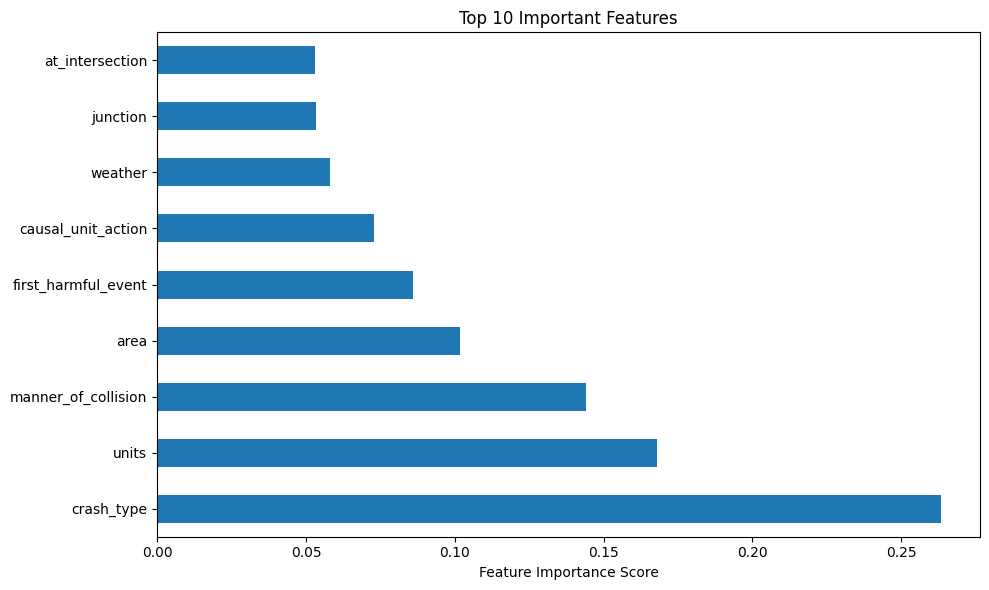

In [12]:
# Plot feature importance
plt.figure(figsize=(10, 6))
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.xlabel("Feature Importance Score")
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


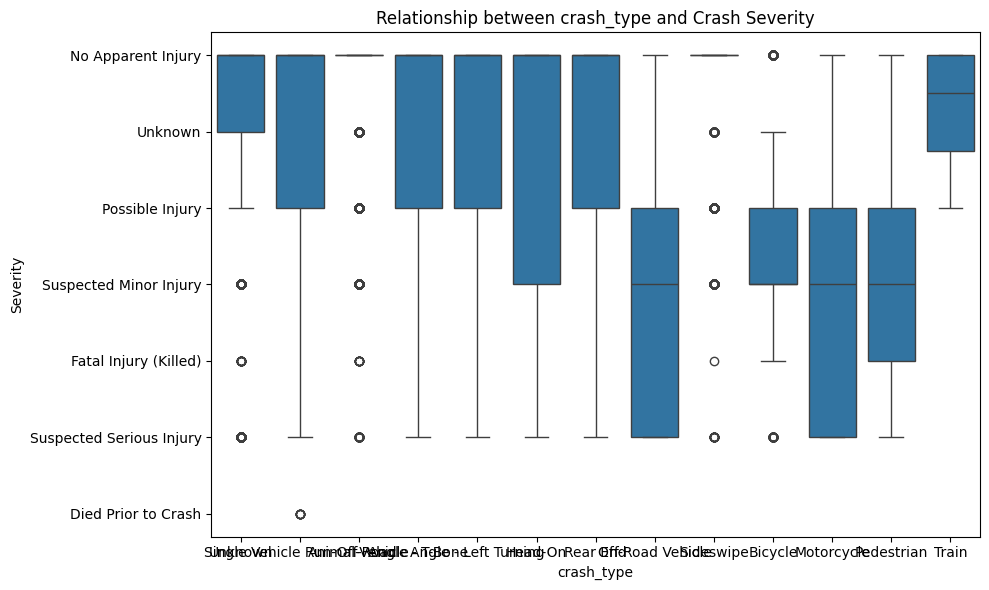

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


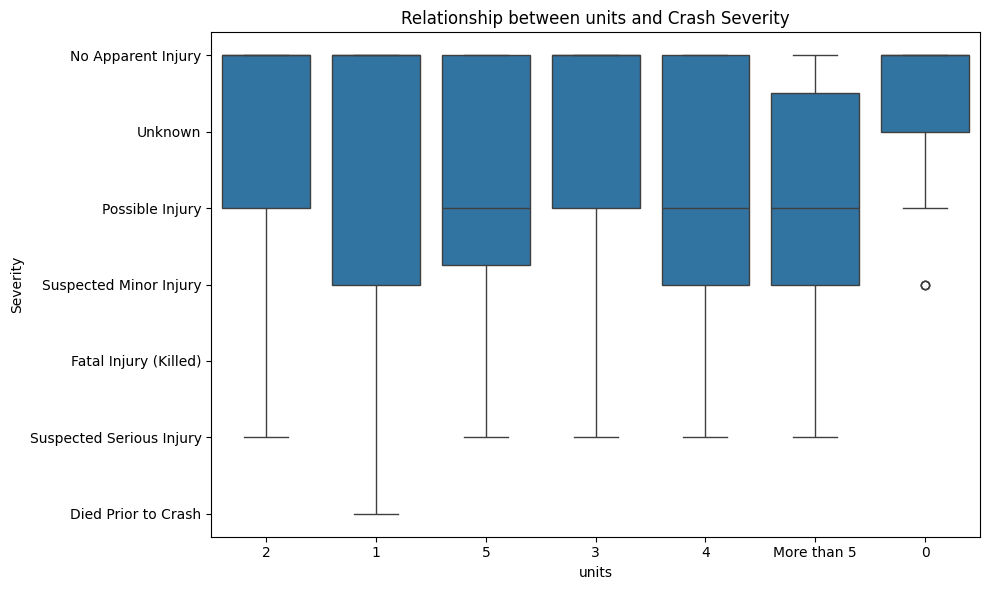

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


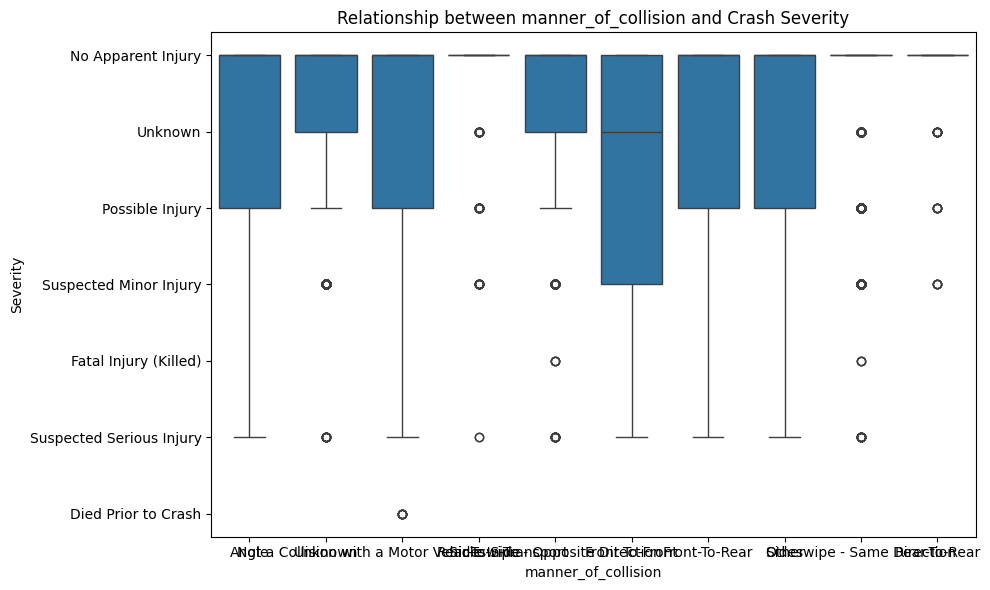

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


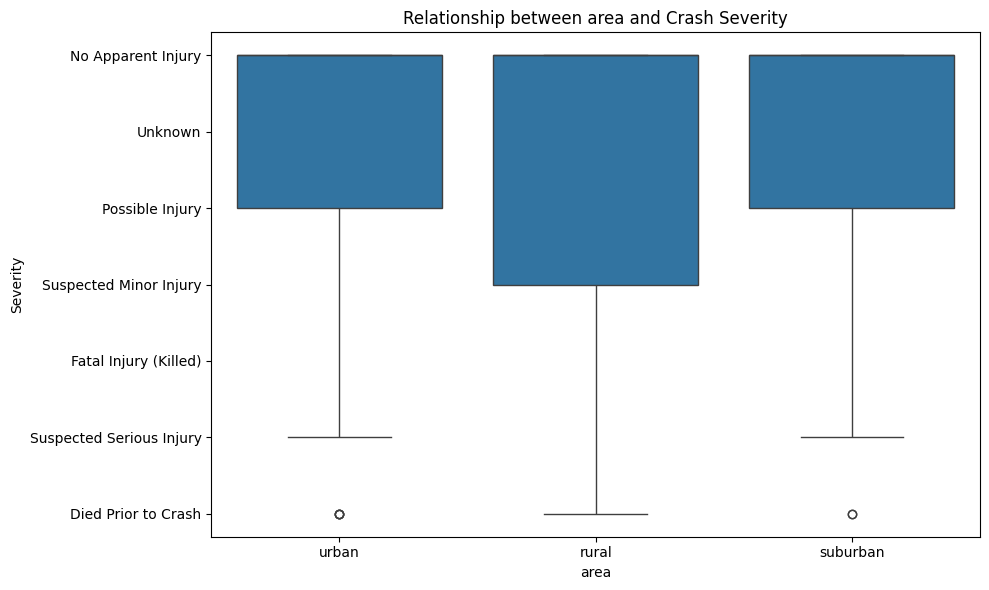

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


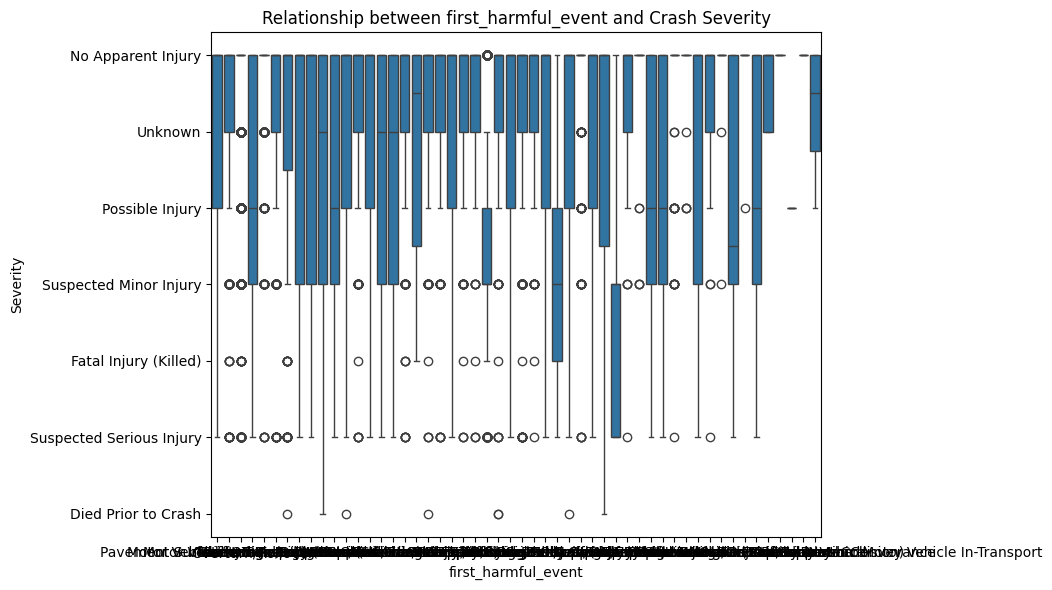

In [13]:
# Analyze the relationship between top features and crash severity
top_features = feat_importances.nlargest(5).index.tolist()

for feature in top_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[feature], y=df['severity'])
    plt.title(f"Relationship between {feature} and Crash Severity")
    plt.xlabel(feature)
    plt.ylabel("Severity")
    plt.tight_layout()
    plt.show()

In [14]:
# Print insights
print("Insights:")
print("1. The top contributing factors to car crash severity in Alaska are:")
for i, feature in enumerate(feat_importances.nlargest(5).index, 1):
    print(f"   {i}. {feature}")

print("\n2. The model's performance in predicting crash severity can be seen in the classification report above.")
print("\n3. The confusion matrix shows the model's prediction accuracy for different severity levels.")
print("\n4. The box plots illustrate the relationship between top features and crash severity.")
print("\n5. Further analysis may be needed to understand the specific impact of each factor on crash severity.")
print("\n6. The severity levels have been encoded as follows:")
for severity, code in severity_mapping.items():
    print(f"   {code}: {severity}")

Insights:
1. The top contributing factors to car crash severity in Alaska are:
   1. crash_type
   2. units
   3. manner_of_collision
   4. area
   5. first_harmful_event

2. The model's performance in predicting crash severity can be seen in the classification report above.

3. The confusion matrix shows the model's prediction accuracy for different severity levels.

4. The box plots illustrate the relationship between top features and crash severity.

5. Further analysis may be needed to understand the specific impact of each factor on crash severity.

6. The severity levels have been encoded as follows:
   0: Fatal Injury (Killed)
   1: No Apparent Injury
   2: Possible Injury
   3: Suspected Minor Injury
   4: Suspected Serious Injury
